## Import Data

In [1]:
import re
import emoji
import pandas as pd
import numpy as np

data = pd.read_csv('4000-2.csv')
data

,Datetime,Username,Like Counts,Tweet,Class
0,2022-11-02 20:59:07+00:00,Syar_bjm,3,@PangeranBiru212 @Samudera_Estu Knp hanya usta...,Feelings and Problematization
1,2022-11-10 04:50:26+00:00,Hazelnutxha,0,Replyannya bnrn darurat edukasi mental health ...,Feelings and Problematization
2,2022-12-17 22:56:06+00:00,Ailsiene_,0,Looks : eh.. 8 ? Aku agak insecure sih smaa di...,-
3,2022-12-23 13:47:24+00:00,nshnsh__,0,@Aku_Survivor mental health awareness. tajuk p...,-
4,2022-11-14 22:44:42+00:00,wawanikip,0,Generasi melek mental health tapi gak ngerti a...,Youth
...,...,...,...,...,...
4354,2022-10-30 19:38:01+00:00,mbaimmmm,0,"@simplybadut Pas udah tenang, dia cerita kalo ...",Classification
4355,2022-11-19 09:29:03+00:00,collegemenfess,2,[cm] hii hii🙏maaf all disini aku mau minta tol...,Accessibility and Funding
4356,2022-10-27 14:10:16+00:00,convomfs,6,🤍 tw mental health issues\n\nada yang tau ga k...,Accessibility and Funding
4357,2022-12-19 17:48:42+00:00,UGM_FESS,30,Ugm_fess generasi kita yg paling keras teriak ...,Youth


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Datetime     4359 non-null   object
 1   Username     4359 non-null   object
 2   Like Counts  4359 non-null   int64 
 3   Tweet        4359 non-null   object
 4   Class        4359 non-null   object
dtypes: int64(1), object(4)
memory usage: 170.4+ KB


## Preprocessing

In [3]:
data = data[data.Class != '-']

In [4]:
slang_words = {"&amp;": "dan", "@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "skg": "sekarang", "skrg": "sekarang", "skrng": "sekarang", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkwk": "tertawa","wkwk": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "bundir": "bunuh diri"}

In [5]:
def apply_abbreviations(text):
    words = text.split()
    abbreviated_words = [slang_words.get(word, word) for word in words]
    return ' '.join(abbreviated_words)

In [6]:
def cleanTweets(text):
    text = re.sub(r'@\w+', '', text) 
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('[^a-zA-Z]', ' ', str(text).lower().strip())
    text = re.sub('#','',text)
    text = re.sub('\d+', '', text)
    text = re.sub('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]+','', text) 
    text = re.sub('RT[\s]+','',text)
    text = re.sub('\n',' ',text)
    text = emoji.replace_emoji(text, replace='')
    return text
data['cleanText'] = data['Tweet'].apply(cleanTweets) 
data

/var/folders/_l/mh9hlz0s03xg8z3s309b4qgr0000gn/T/ipykernel_5697/3477948138.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleanText'] = data['Tweet'].apply(cleanTweets)


,Datetime,Username,Like Counts,Tweet,Class,cleanText
0,2022-11-02 20:59:07+00:00,Syar_bjm,3,@PangeranBiru212 @Samudera_Estu Knp hanya usta...,Feelings and Problematization,knp hanya ustadz knp bkn guru yg tdk cukup me...
1,2022-11-10 04:50:26+00:00,Hazelnutxha,0,Replyannya bnrn darurat edukasi mental health ...,Feelings and Problematization,replyannya bnrn darurat edukasi mental health ...
4,2022-11-14 22:44:42+00:00,wawanikip,0,Generasi melek mental health tapi gak ngerti a...,Youth,generasi melek mental health tapi gak ngerti a...
5,2022-12-20 08:12:15+00:00,minkabora,0,"@indomyfess Logikanya, siapa yang bener2 berju...",Feelings and Problematization,logikanya siapa yang bener berjuang ga meny...
6,2022-12-01 14:21:33+00:00,wipilarpa,0,Kalau lingkungan kerjanya sama kaya yg di Band...,Stigma,kalau lingkungan kerjanya sama kaya yg di band...
...,...,...,...,...,...,...
4354,2022-10-30 19:38:01+00:00,mbaimmmm,0,"@simplybadut Pas udah tenang, dia cerita kalo ...",Classification,pas udah tenang dia cerita kalo dia udah bias...
4355,2022-11-19 09:29:03+00:00,collegemenfess,2,[cm] hii hii🙏maaf all disini aku mau minta tol...,Accessibility and Funding,cm hii hii maaf all disini aku mau minta tol...
4356,2022-10-27 14:10:16+00:00,convomfs,6,🤍 tw mental health issues\n\nada yang tau ga k...,Accessibility and Funding,tw mental health issues ada yang tau ga kal...
4357,2022-12-19 17:48:42+00:00,UGM_FESS,30,Ugm_fess generasi kita yg paling keras teriak ...,Youth,ugm fess generasi kita yg paling keras teriak ...


In [7]:
data['cleanText'] = data['cleanText'].apply(apply_abbreviations)

/var/folders/_l/mh9hlz0s03xg8z3s309b4qgr0000gn/T/ipykernel_5697/1182019028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleanText'] = data['cleanText'].apply(apply_abbreviations)


## Stopwords

In [8]:
from nltk import word_tokenize
from nltk.corpus import stopwords

stopWords = set(stopwords.words('indonesian'))
def removeStopwords(text):
    text = [w for w in word_tokenize(text) if not w in stopWords]
    return ' '.join(text)

data['cleanText'] = data['cleanText'].apply(removeStopwords)
data

/var/folders/_l/mh9hlz0s03xg8z3s309b4qgr0000gn/T/ipykernel_5697/2315804950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleanText'] = data['cleanText'].apply(removeStopwords)


,Datetime,Username,Like Counts,Tweet,Class,cleanText
0,2022-11-02 20:59:07+00:00,Syar_bjm,3,@PangeranBiru212 @Samudera_Estu Knp hanya usta...,Feelings and Problematization,ustadz guru mengajarkan budi pekerti polisi me...
1,2022-11-10 04:50:26+00:00,Hazelnutxha,0,Replyannya bnrn darurat edukasi mental health ...,Feelings and Problematization,replyannya bnrn darurat edukasi mental health ...
4,2022-11-14 22:44:42+00:00,wawanikip,0,Generasi melek mental health tapi gak ngerti a...,Youth,generasi melek mental health gak mengerti atti...
5,2022-12-20 08:12:15+00:00,minkabora,0,"@indomyfess Logikanya, siapa yang bener2 berju...",Feelings and Problematization,logikanya berjuang ga menyerah rendah hati eng...
6,2022-12-01 14:21:33+00:00,wipilarpa,0,Kalau lingkungan kerjanya sama kaya yg di Band...,Stigma,lingkungan kerjanya kaya bandung mah gakan pin...
...,...,...,...,...,...,...
4354,2022-10-30 19:38:01+00:00,mbaimmmm,0,"@simplybadut Pas udah tenang, dia cerita kalo ...",Classification,pas tenang cerita gitu stress anxiety akibat t...
4355,2022-11-19 09:29:03+00:00,collegemenfess,2,[cm] hii hii🙏maaf all disini aku mau minta tol...,Accessibility and Funding,cm hii hii maaf all tolong proposal webinar kh...
4356,2022-10-27 14:10:16+00:00,convomfs,6,🤍 tw mental health issues\n\nada yang tau ga k...,Accessibility and Funding,mental health issues ga urgent banget amp uang...
4357,2022-12-19 17:48:42+00:00,UGM_FESS,30,Ugm_fess generasi kita yg paling keras teriak ...,Youth,ugm fess generasi keras teriak mental health o...


## Target Class Distribution (Data Original)

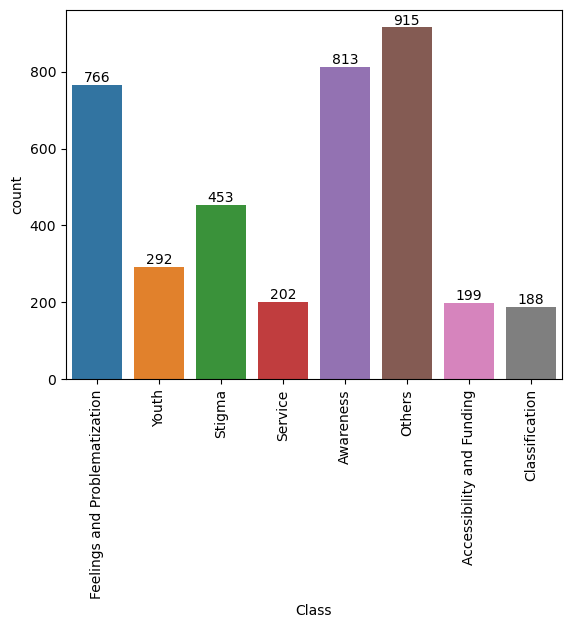

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x=data['Class'])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.show()

## Wordcloud

(-0.5, 1599.5, 799.5, -0.5)

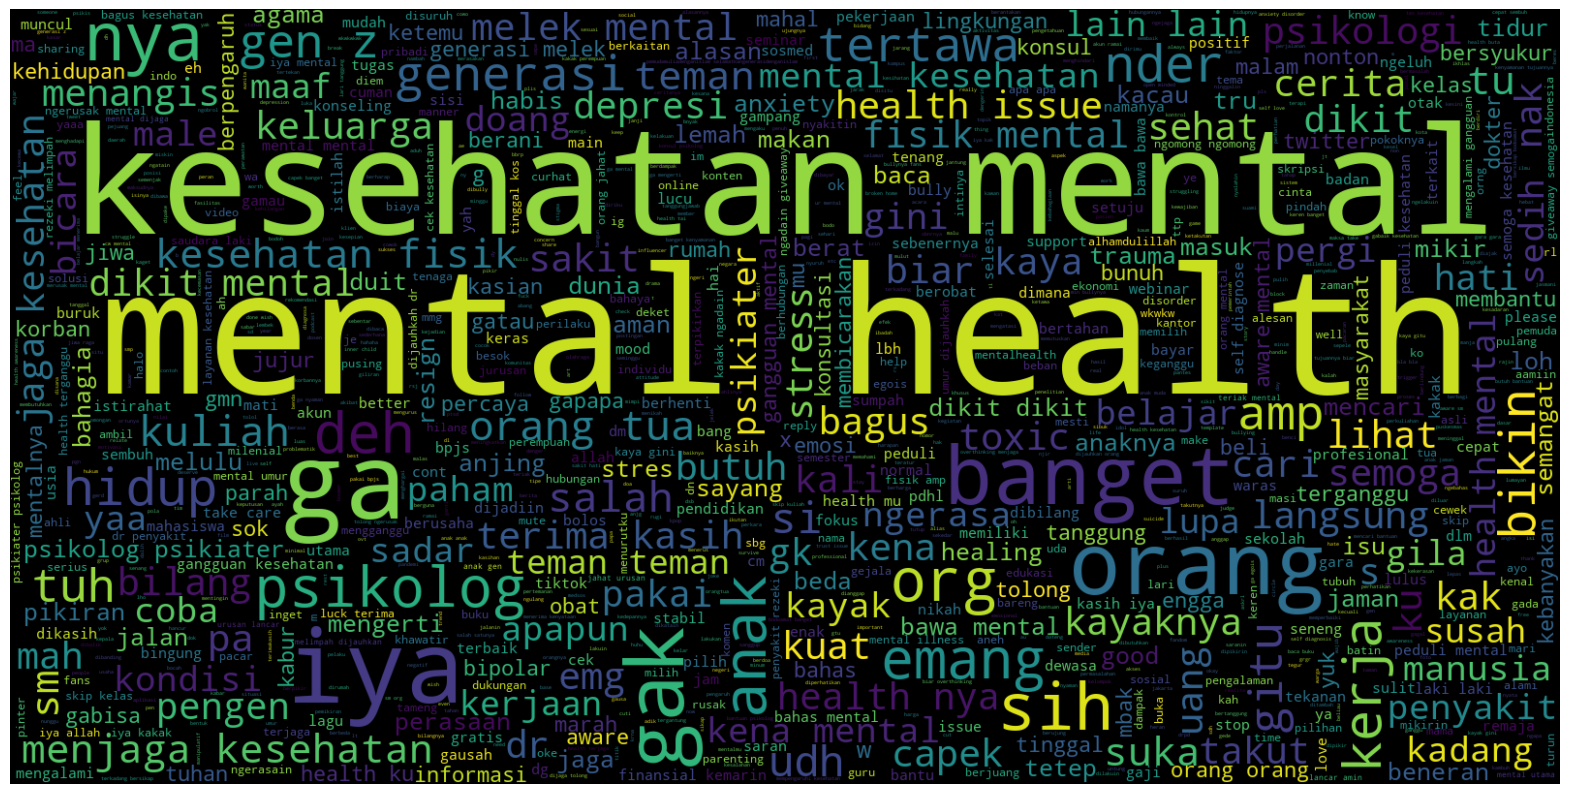

In [10]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words=1000 , width=1600 , height=800).generate(" ".join(data.cleanText))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

In [11]:
data.Class.value_counts()

Others                           915
Awareness                        813
Feelings and Problematization    766
Stigma                           453
Youth                            292
Service                          202
Accessibility and Funding        199
Classification                   188
Name: Class, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data = data[data.Class != 'Others']
data['Class'] = le.fit_transform(data['Class'])

/var/folders/_l/mh9hlz0s03xg8z3s309b4qgr0000gn/T/ipykernel_4780/4177335227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Class'] = le.fit_transform(data['Class'])


## Target Class Distribution (7 Class, Except Others)

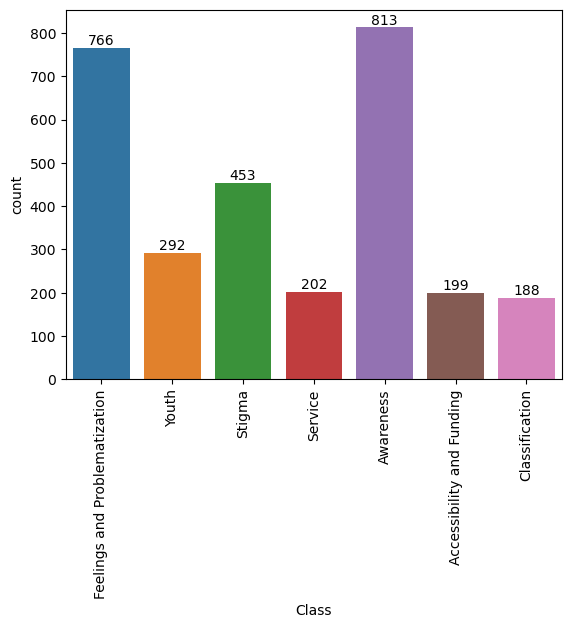

In [ ]:
ax = sns.countplot(x=data['Class'])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.show()

## Bag of Words 

In [ ]:
import tensorflow as tf

tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(data['cleanText'].to_list())
sequences = tokenizer.texts_to_sequences(data['cleanText'].to_list())

In [ ]:
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_sequence_length)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(max_sequence_length,), dtype='int32'))
model.add(tf.keras.layers.Embedding(len(tokenizer.word_index) + 1, 16))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 43, 16)            141360    
                                                                 
 flatten (Flatten)           (None, 688)               0         
                                                                 
 dense (Dense)               (None, 7)                 4823      
                                                                 
Total params: 146183 (571.03 KB)
Trainable params: 146183 (571.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

train_sequences, val_sequences, train_labels, val_labels = train_test_split(
    padded_sequences, np.array(data['Class']), test_size=0.1, random_state=43)

In [ ]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_sequences, train_labels, epochs=30, batch_size=32, validation_data=(val_sequences, val_labels))

Epoch 1/30
82/82 [==============================] - 0s 2ms/step - loss: 1.7794 - accuracy: 0.2972 - val_loss: 1.7666 - val_accuracy: 0.3048
Epoch 2/30
82/82 [==============================] - 0s 1ms/step - loss: 1.6524 - accuracy: 0.3796 - val_loss: 1.7044 - val_accuracy: 0.3459
Epoch 3/30
82/82 [==============================] - 0s 1ms/step - loss: 1.5032 - accuracy: 0.4357 - val_loss: 1.6196 - val_accuracy: 0.3562
Epoch 4/30
82/82 [==============================] - 0s 1ms/step - loss: 1.2968 - accuracy: 0.5361 - val_loss: 1.5200 - val_accuracy: 0.3870
Epoch 5/30
82/82 [==============================] - 0s 1ms/step - loss: 1.0644 - accuracy: 0.6994 - val_loss: 1.4338 - val_accuracy: 0.4281
Epoch 6/30
82/82 [==============================] - 0s 1ms/step - loss: 0.8434 - accuracy: 0.8089 - val_loss: 1.3651 - val_accuracy: 0.4623
Epoch 7/30
82/82 [==============================] - 0s 1ms/step - loss: 0.6559 - accuracy: 0.8791 - val_loss: 1.3206 - val_accuracy: 0.4658
Epoch 8/30
82/82 [==

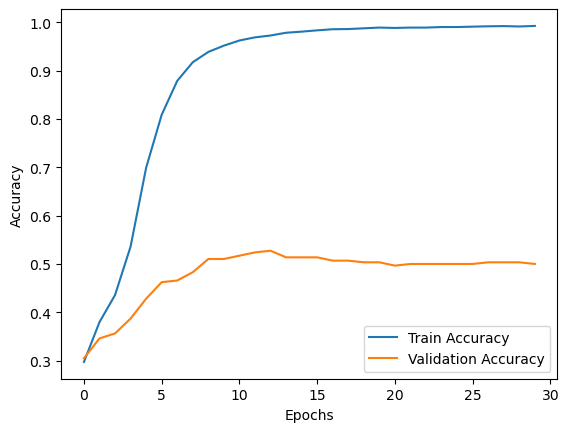

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

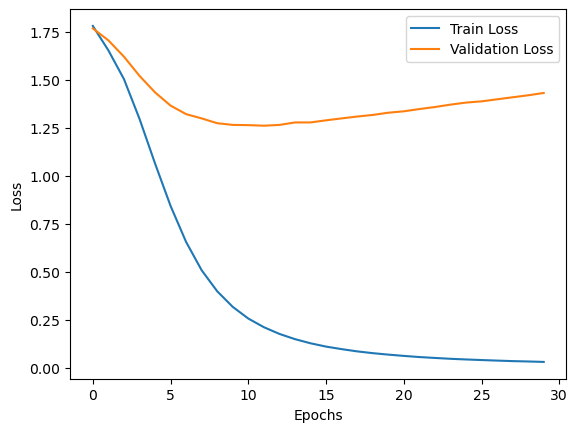

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict(val_sequences)
predicted_labels = np.argmax(predictions, axis=-1)

classification_rep = classification_report(predicted_labels, val_labels, target_names=['Accessibility and Funding', 'Awareness', 'Classification', 'Feelings and Problematization', 'Service', 'Stigma', 'Youth'])
print(classification_rep)

10/10 [==============================] - 0s 456us/step
                               precision    recall  f1-score   support

    Accessibility and Funding       0.50      0.55      0.52        20
                    Awareness       0.64      0.55      0.59        87
               Classification       0.42      0.73      0.53        11
Feelings and Problematization       0.58      0.43      0.49        95
                      Service       0.39      0.47      0.43        19
                       Stigma       0.15      0.22      0.18        32
                        Youth       0.61      0.79      0.69        28

                     accuracy                           0.50       292
                    macro avg       0.47      0.53      0.49       292
                 weighted avg       0.53      0.50      0.51       292



## TF-IDF 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_features = vectorizer.fit_transform(data['cleanText'].to_list())

In [ ]:
features = tfidf_features.toarray()
labels = np.array(data['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
train_sequences, val_sequences, train_labels, val_labels = train_test_split(features, labels, test_size=0.1, random_state=20)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(train_sequences.shape[1],)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 256)               2256896   
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 2258695 (8.62 MB)
Trainable params: 2258695 (8.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_sequences, train_labels, epochs=30, validation_data=(val_sequences, val_labels))

Epoch 1/30
82/82 [==============================] - 0s 4ms/step - loss: 1.7610 - accuracy: 0.3880 - val_loss: 1.5631 - val_accuracy: 0.4418
Epoch 2/30
82/82 [==============================] - 0s 4ms/step - loss: 1.2283 - accuracy: 0.5906 - val_loss: 1.2182 - val_accuracy: 0.5685
Epoch 3/30
82/82 [==============================] - 0s 4ms/step - loss: 0.6278 - accuracy: 0.8806 - val_loss: 1.0599 - val_accuracy: 0.5993
Epoch 4/30
82/82 [==============================] - 0s 4ms/step - loss: 0.2865 - accuracy: 0.9645 - val_loss: 1.0417 - val_accuracy: 0.5753
Epoch 5/30
82/82 [==============================] - 0s 4ms/step - loss: 0.1529 - accuracy: 0.9790 - val_loss: 1.0571 - val_accuracy: 0.5890
Epoch 6/30
82/82 [==============================] - 0s 4ms/step - loss: 0.0970 - accuracy: 0.9840 - val_loss: 1.0916 - val_accuracy: 0.5890
Epoch 7/30
82/82 [==============================] - 0s 4ms/step - loss: 0.0685 - accuracy: 0.9893 - val_loss: 1.1328 - val_accuracy: 0.5719
Epoch 8/30
82/82 [==

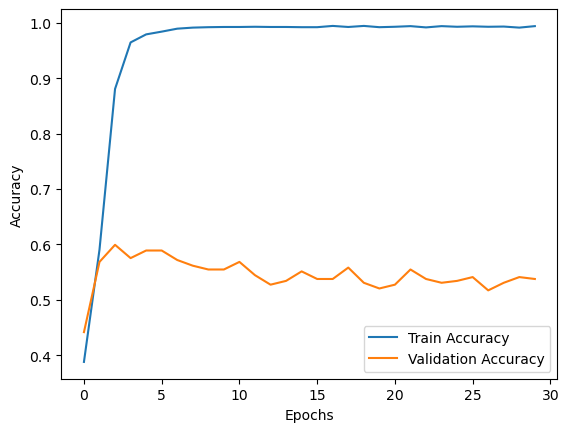

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

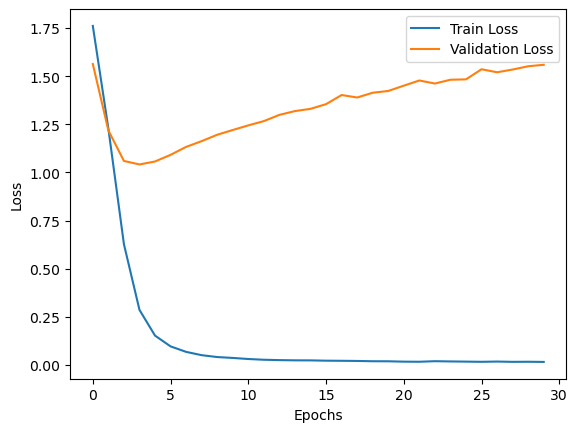

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(val_sequences)
predicted_labels = np.argmax(predictions, axis=-1)

classification_rep = classification_report(predicted_labels, val_labels, target_names=['Accessibility and Funding', 'Awareness', 'Classification', 'Feelings and Problematization', 'Service', 'Stigma', 'Youth'])
print(classification_rep)

10/10 [==============================] - 0s 1ms/step
                               precision    recall  f1-score   support

    Accessibility and Funding       0.36      0.75      0.49        12
                    Awareness       0.71      0.57      0.63       103
               Classification       0.50      0.78      0.61         9
Feelings and Problematization       0.46      0.51      0.49        68
                      Service       0.62      0.65      0.64        23
                       Stigma       0.30      0.25      0.27        53
                        Youth       0.70      0.79      0.75        24

                     accuracy                           0.54       292
                    macro avg       0.52      0.61      0.55       292
                 weighted avg       0.55      0.54      0.54       292



## N-Grams

### 2-Grams

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data['cleanText'], np.array(data['Class']), test_size=0.1, random_state=20)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2))
vectorizer.fit(train_data)

CountVectorizer(ngram_range=(2, 2))

In [ ]:
train_vectors = vectorizer.transform(train_data).toarray()
test_vectors = vectorizer.transform(test_data).toarray()

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_dim=train_vectors.shape[1]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                437152    
                                                                 
 flatten_2 (Flatten)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 7)                 119       
                                                                 
Total params: 437271 (1.67 MB)
Trainable params: 437271 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_vectors, train_labels, epochs=30, batch_size=32, validation_data=(test_vectors, test_labels))

Epoch 1/30
82/82 [==============================] - 0s 4ms/step - loss: 1.8788 - accuracy: 0.3617 - val_loss: 1.7925 - val_accuracy: 0.4144
Epoch 2/30
82/82 [==============================] - 0s 3ms/step - loss: 1.5243 - accuracy: 0.4918 - val_loss: 1.6211 - val_accuracy: 0.4315
Epoch 3/30
82/82 [==============================] - 0s 3ms/step - loss: 1.0441 - accuracy: 0.7097 - val_loss: 1.5218 - val_accuracy: 0.4418
Epoch 4/30
82/82 [==============================] - 0s 3ms/step - loss: 0.6194 - accuracy: 0.9100 - val_loss: 1.4579 - val_accuracy: 0.4521
Epoch 5/30
82/82 [==============================] - 0s 3ms/step - loss: 0.3605 - accuracy: 0.9603 - val_loss: 1.4238 - val_accuracy: 0.4692
Epoch 6/30
82/82 [==============================] - 0s 3ms/step - loss: 0.2302 - accuracy: 0.9763 - val_loss: 1.4072 - val_accuracy: 0.4795
Epoch 7/30
82/82 [==============================] - 0s 3ms/step - loss: 0.1619 - accuracy: 0.9821 - val_loss: 1.4024 - val_accuracy: 0.4863
Epoch 8/30
82/82 [==

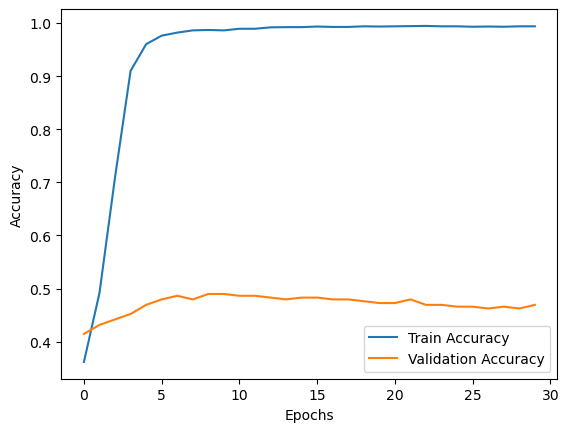

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

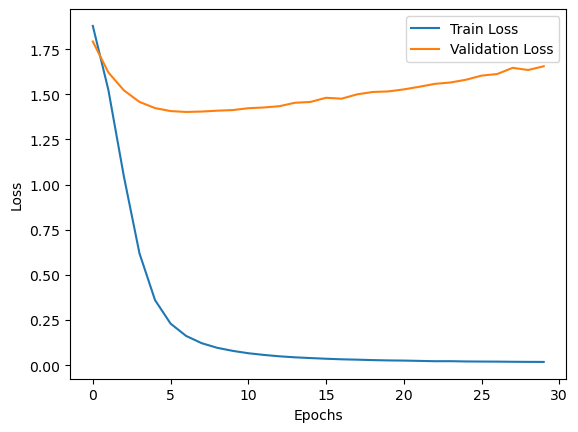

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(test_vectors)
predicted_labels = np.argmax(predictions, axis=-1)

classification_rep = classification_report(predicted_labels, test_labels, target_names=['Accessibility and Funding', 'Awareness', 'Classification', 'Feelings and Problematization', 'Service', 'Stigma', 'Youth'])
print(classification_rep)

10/10 [==============================] - 0s 1ms/step
                               precision    recall  f1-score   support

    Accessibility and Funding       0.16      0.57      0.25         7
                    Awareness       0.96      0.42      0.58       191
               Classification       0.07      1.00      0.13         1
Feelings and Problematization       0.43      0.60      0.50        55
                      Service       0.12      1.00      0.22         3
                       Stigma       0.05      0.12      0.07        16
                        Youth       0.52      0.74      0.61        19

                     accuracy                           0.47       292
                    macro avg       0.33      0.64      0.34       292
                 weighted avg       0.75      0.47      0.53       292



### 3-Grams

In [ ]:
vectorizer = CountVectorizer(ngram_range=(3,3))
vectorizer.fit(train_data)

CountVectorizer(ngram_range=(3, 3))

In [ ]:
train_vectors = vectorizer.transform(train_data).toarray()
test_vectors = vectorizer.transform(test_data).toarray()

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_dim=train_vectors.shape[1]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                485536    
                                                                 
 flatten_3 (Flatten)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 7)                 119       
                                                                 
Total params: 485655 (1.85 MB)
Trainable params: 485655 (1.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_vectors, train_labels, epochs=30, batch_size=32, validation_data=(test_vectors, test_labels))

Epoch 1/30
82/82 [==============================] - 1s 5ms/step - loss: 1.8993 - accuracy: 0.3148 - val_loss: 1.8384 - val_accuracy: 0.4007
Epoch 2/30
82/82 [==============================] - 0s 4ms/step - loss: 1.6094 - accuracy: 0.5681 - val_loss: 1.7254 - val_accuracy: 0.4041
Epoch 3/30
82/82 [==============================] - 0s 3ms/step - loss: 1.1820 - accuracy: 0.7173 - val_loss: 1.6483 - val_accuracy: 0.4212
Epoch 4/30
82/82 [==============================] - 0s 3ms/step - loss: 0.7425 - accuracy: 0.8977 - val_loss: 1.5974 - val_accuracy: 0.4281
Epoch 5/30
82/82 [==============================] - 0s 3ms/step - loss: 0.4376 - accuracy: 0.9718 - val_loss: 1.5720 - val_accuracy: 0.4178
Epoch 6/30
82/82 [==============================] - 0s 3ms/step - loss: 0.2686 - accuracy: 0.9859 - val_loss: 1.5656 - val_accuracy: 0.4110
Epoch 7/30
82/82 [==============================] - 0s 3ms/step - loss: 0.1808 - accuracy: 0.9882 - val_loss: 1.5673 - val_accuracy: 0.4075
Epoch 8/30
82/82 [==

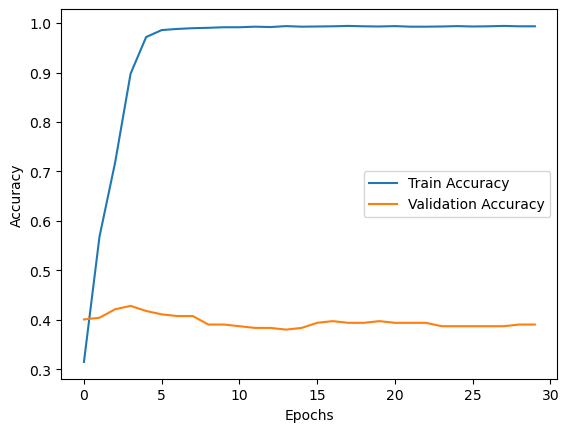

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

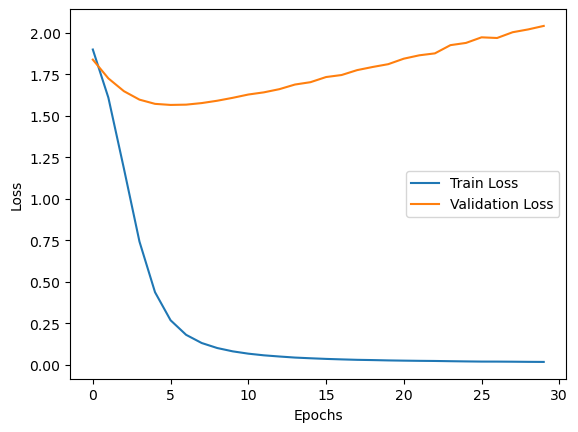

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(test_vectors)
predicted_labels = np.argmax(predictions, axis=-1)

classification_rep = classification_report(predicted_labels, test_labels, target_names=['Accessibility and Funding', 'Awareness', 'Classification', 'Feelings and Problematization', 'Service', 'Stigma', 'Youth'])
print(classification_rep)

10/10 [==============================] - 0s 1ms/step
                               precision    recall  f1-score   support

    Accessibility and Funding       0.04      0.50      0.07         2
                    Awareness       0.99      0.34      0.51       239
               Classification       0.00      0.00      0.00         0
Feelings and Problematization       0.22      0.61      0.33        28
                      Service       0.04      1.00      0.08         1
                       Stigma       0.05      0.22      0.08         9
                        Youth       0.41      0.85      0.55        13

                     accuracy                           0.39       292
                    macro avg       0.25      0.50      0.23       292
                 weighted avg       0.85      0.39      0.48       292



/Users/athena/mlenv/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/athena/mlenv/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/athena/mlenv/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## FastText

In [ ]:
import fasttext

ft = fasttext.load_model('fasttext/cc.id.300.bin')

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
embedding_dim = 300  # Dimensionality of the word embeddings

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in ft:
        embedding_matrix[i] = ft[word]

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.7, recurrent_dropout=0.3, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.7, recurrent_dropout=0.3)))
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 43, 300)           2650500   
                                                                 
 bidirectional (Bidirection  (None, 43, 128)           186880    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, 7)                 455       
                                                                 
Total params: 2879051 (10.98 MB)
Trainable params: 228551 (892.78 KB)
Non-trainable params: 2650500 (10.11 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_sequences, val_sequences, train_labels, val_labels = train_test_split(
    padded_sequences, np.array(data['Class']), test_size=0.1, random_state=20)

In [ ]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_sequences, train_labels, epochs=30, batch_size=32, validation_data=(val_sequences, val_labels))

Epoch 1/30
82/82 [==============================] - 11s 101ms/step - loss: 1.7516 - accuracy: 0.3239 - val_loss: 1.5963 - val_accuracy: 0.3870
Epoch 2/30
82/82 [==============================] - 10s 123ms/step - loss: 1.4879 - accuracy: 0.4357 - val_loss: 1.3040 - val_accuracy: 0.5274
Epoch 3/30
82/82 [==============================] - 10s 125ms/step - loss: 1.3617 - accuracy: 0.4823 - val_loss: 1.2110 - val_accuracy: 0.5274
Epoch 4/30
82/82 [==============================] - 10s 127ms/step - loss: 1.2800 - accuracy: 0.5120 - val_loss: 1.1537 - val_accuracy: 0.5377
Epoch 5/30
82/82 [==============================] - 10s 126ms/step - loss: 1.2418 - accuracy: 0.5238 - val_loss: 1.1140 - val_accuracy: 0.5616
Epoch 6/30
82/82 [==============================] - 10s 126ms/step - loss: 1.2218 - accuracy: 0.5349 - val_loss: 1.0440 - val_accuracy: 0.5890
Epoch 7/30
82/82 [==============================] - 10s 127ms/step - loss: 1.1718 - accuracy: 0.5658 - val_loss: 1.0158 - val_accuracy: 0.6027

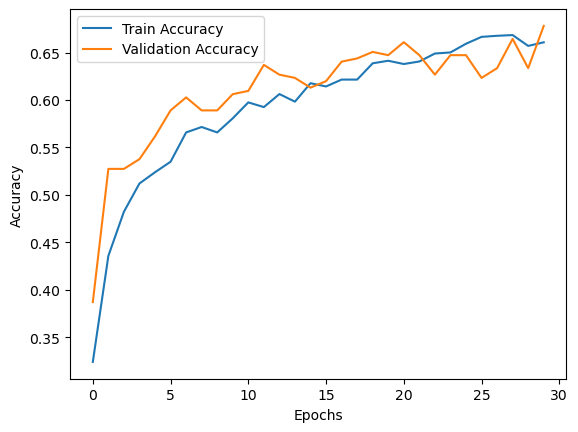

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

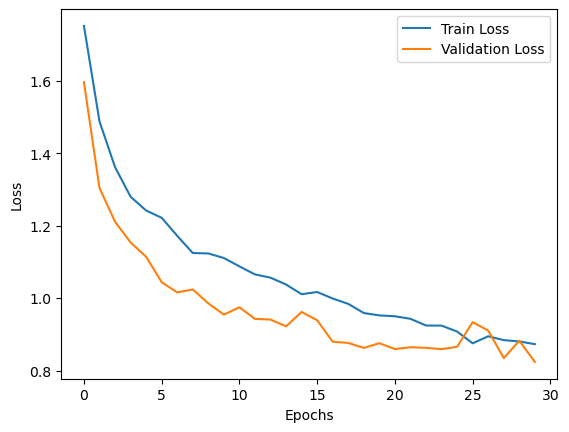

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(val_sequences)
predicted_labels = np.argmax(predictions, axis=-1)

classification_rep = classification_report(predicted_labels, val_labels, target_names=['Accessibility and Funding', 'Awareness', 'Classification', 'Feelings and Problematization', 'Service', 'Stigma', 'Youth'])
print(classification_rep)

10/10 [==============================] - 0s 14ms/step
                               precision    recall  f1-score   support

    Accessibility and Funding       0.56      0.70      0.62        20
                    Awareness       0.88      0.68      0.77       107
               Classification       0.71      0.71      0.71        14
Feelings and Problematization       0.70      0.71      0.70        75
                      Service       0.62      0.60      0.61        25
                       Stigma       0.23      0.45      0.31        22
                        Youth       0.85      0.79      0.82        29

                     accuracy                           0.68       292
                    macro avg       0.65      0.66      0.65       292
                 weighted avg       0.73      0.68      0.70       292



## BPE (Byte-Pair Encoding)

In [ ]:
from bpemb import BPEmb

bpe_id = BPEmb(lang='id', vs=100000, dim=100)

In [ ]:
embedding_matrix = data['cleanText'].apply(bpe_id.encode_ids)

In [ ]:
max_length = max(embedding_matrix.apply(len))
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(embedding_matrix, maxlen=max_length)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(bpe_id.vectors.shape[0], bpe_id.vectors.shape[1], input_length=max_length))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.7, recurrent_dropout=0.3, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.7, recurrent_dropout=0.3)))
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 56, 100)           10000000  
                                                                 
 bidirectional_2 (Bidirecti  (None, 56, 128)           84480     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 7)                 455       
                                                                 
Total params: 10126151 (38.63 MB)
Trainable params: 10126151 (38.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_sequences, val_sequences, train_labels, val_labels = train_test_split(
    padded_sequences, np.array(data['Class']), test_size=0.1, random_state=20)

In [ ]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-3)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_sequences, train_labels, epochs=30, validation_data=(val_sequences, val_labels))

Epoch 1/30
82/82 [==============================] - 14s 130ms/step - loss: 1.7601 - accuracy: 0.3064 - val_loss: 1.6539 - val_accuracy: 0.3973
Epoch 2/30
82/82 [==============================] - 12s 151ms/step - loss: 1.4197 - accuracy: 0.4487 - val_loss: 1.2601 - val_accuracy: 0.5411
Epoch 3/30
82/82 [==============================] - 12s 152ms/step - loss: 1.0124 - accuracy: 0.6337 - val_loss: 1.1628 - val_accuracy: 0.5651
Epoch 4/30
82/82 [==============================] - 12s 147ms/step - loss: 0.7600 - accuracy: 0.7310 - val_loss: 1.1453 - val_accuracy: 0.5651
Epoch 5/30
82/82 [==============================] - 12s 150ms/step - loss: 0.5755 - accuracy: 0.8066 - val_loss: 1.2228 - val_accuracy: 0.5719
Epoch 6/30
82/82 [==============================] - 12s 152ms/step - loss: 0.4755 - accuracy: 0.8466 - val_loss: 1.3848 - val_accuracy: 0.5616
Epoch 7/30
82/82 [==============================] - 13s 156ms/step - loss: 0.3948 - accuracy: 0.8764 - val_loss: 1.5008 - val_accuracy: 0.5651

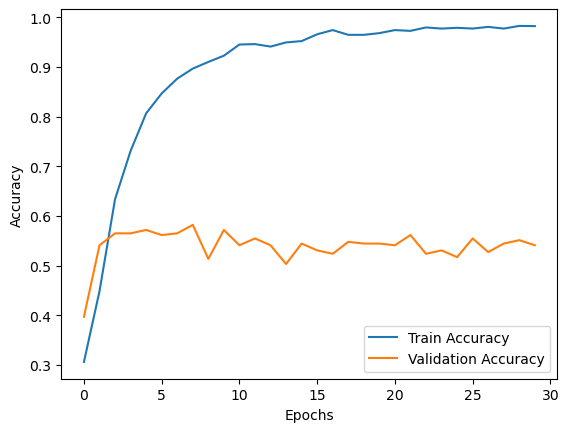

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

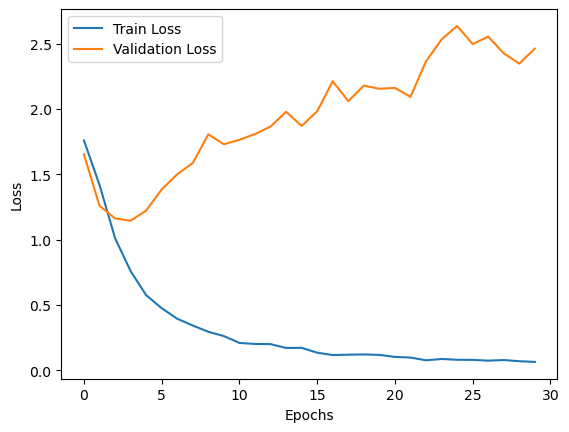

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict(val_sequences)
predicted_labels = np.argmax(predictions, axis=-1)

classification_rep = classification_report(val_labels, predicted_labels, target_names=['Accessibility and Funding', 'Awareness', 'Classification', 'Feelings and Problematization', 'Service', 'Stigma', 'Youth'])
print(classification_rep)

10/10 [==============================] - 0s 15ms/step
                               precision    recall  f1-score   support

    Accessibility and Funding       0.57      0.32      0.41        25
                    Awareness       0.65      0.66      0.66        83
               Classification       0.47      0.64      0.55        14
Feelings and Problematization       0.57      0.50      0.53        76
                      Service       0.50      0.50      0.50        24
                       Stigma       0.25      0.33      0.29        43
                        Youth       0.76      0.81      0.79        27

                     accuracy                           0.54       292
                    macro avg       0.54      0.54      0.53       292
                 weighted avg       0.55      0.54      0.54       292



## GloVe + Bidirectional LSTM

In [ ]:
import tensorflow as tf

tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(data['cleanText'].to_list())
sequences = tokenizer.texts_to_sequences(data['cleanText'].to_list())

In [ ]:
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_sequence_length)

In [ ]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

In [ ]:
glove_file = 'glove/glove.twitter.27B.200d.txt'
embeddings_index = {}
with open(glove_file, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        embeddings = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embeddings

In [ ]:
embedding_dim = 200
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.7, recurrent_dropout=0.3, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.7, recurrent_dropout=0.3)))
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 43, 200)           1767000   
                                                                 
 bidirectional_4 (Bidirecti  (None, 43, 128)           135680    
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_9 (Dense)             (None, 7)                 455       
                                                                 
Total params: 1944351 (7.42 MB)
Trainable params: 177351 (692.78 KB)
Non-trainable params: 1767000 (6.74 MB)
_________________________________________________________________


In [ ]:
train_sequences, val_sequences, train_labels, val_labels = train_test_split(
    padded_sequences, np.array(data['Class']), test_size=0.1, random_state=20)

In [ ]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-2)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_sequences, train_labels, epochs=30, validation_data=(val_sequences, val_labels))

Epoch 1/30
82/82 [==============================] - 10s 87ms/step - loss: 1.5345 - accuracy: 0.4151 - val_loss: 1.1323 - val_accuracy: 0.5856
Epoch 2/30
82/82 [==============================] - 8s 101ms/step - loss: 1.2224 - accuracy: 0.5296 - val_loss: 0.9741 - val_accuracy: 0.6164
Epoch 3/30
82/82 [==============================] - 8s 102ms/step - loss: 1.1831 - accuracy: 0.5467 - val_loss: 0.9762 - val_accuracy: 0.6473
Epoch 4/30
82/82 [==============================] - 8s 103ms/step - loss: 1.1533 - accuracy: 0.5536 - val_loss: 0.9734 - val_accuracy: 0.6336
Epoch 5/30
82/82 [==============================] - 8s 103ms/step - loss: 1.1480 - accuracy: 0.5639 - val_loss: 0.9304 - val_accuracy: 0.6712
Epoch 6/30
82/82 [==============================] - 9s 104ms/step - loss: 1.1079 - accuracy: 0.5700 - val_loss: 0.9409 - val_accuracy: 0.6404
Epoch 7/30
82/82 [==============================] - 9s 104ms/step - loss: 1.0817 - accuracy: 0.5879 - val_loss: 0.9700 - val_accuracy: 0.6301
Epoch 

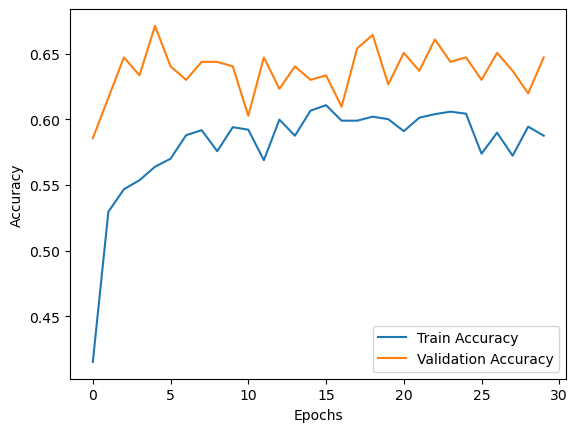

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

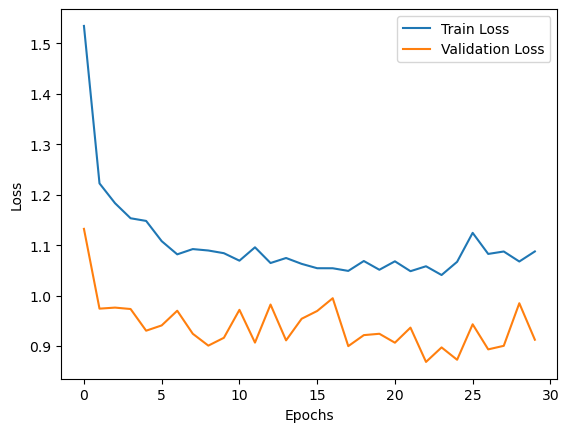

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict(val_sequences)
predicted_labels = np.argmax(predictions, axis=-1)

classification_rep = classification_report(val_labels, predicted_labels, target_names=['Accessibility and Funding', 'Awareness', 'Classification', 'Feelings and Problematization', 'Service', 'Stigma', 'Youth'])
print(classification_rep)

10/10 [==============================] - 0s 14ms/step
                               precision    recall  f1-score   support

    Accessibility and Funding       0.57      0.52      0.54        25
                    Awareness       0.67      0.86      0.75        83
               Classification       1.00      0.21      0.35        14
Feelings and Problematization       0.65      0.70      0.67        76
                      Service       0.48      0.62      0.55        24
                       Stigma       0.47      0.16      0.24        43
                        Youth       0.84      1.00      0.92        27

                     accuracy                           0.65       292
                    macro avg       0.67      0.58      0.57       292
                 weighted avg       0.64      0.65      0.62       292

